# Assessment Test

First of all we start by downloading the data:

In [1]:
import pandas as pd
import numpy as np
import struct
pd.options.display.max_rows = 10


In [2]:
dtng = pd.read_stata('NGPR7AFL.DTA')

In [3]:
dtng.head()

,hhid,hvidx,hv000,hv001,hv002,hv003,hv004,hv005,hv006,hv007,...,idxdis,hdis1,hdis2,hdis3,hdis4,hdis5,hdis6,hdis7,hdis8,hdis9
0,1 1,1,NG7,1,1,1,1,1368354,9,2018,...,1,yes,some difficulty,no,no difficulty hearing,no difficulty communicating,some difficulty,some difficulty,some difficulty,some difficulty
1,1 1,2,NG7,1,1,1,1,1368354,9,2018,...,2,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
2,1 1,3,NG7,1,1,1,1,1368354,9,2018,...,3,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
3,1 1,4,NG7,1,1,1,1,1368354,9,2018,...,4,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
4,1 1,5,NG7,1,1,1,1,1368354,9,2018,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dtng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188010 entries, 0 to 188009
Columns: 357 entries, hhid to hdis9
dtypes: category(280), float64(37), int16(11), int32(5), int8(19), object(5)
memory usage: 131.0+ MB


In [5]:
dtng.describe()

,hvidx,hv001,hv002,hv004,hv005,hv006,hv007,hv008,hv008a,hv009,...,hmlb,hmlc,hmld,hmle,hmhidx,hml14,hml15,hml16a,hml36,idxdis
count,188010.000000,188010.000000,188010.000000,188010.000000,1.880100e+05,188010.000000,188010.0,188010.000000,188010.000000,188010.000000,...,64301.000000,34412.000000,10267.000000,0.0,188010.000000,653.000000,7.000000,11590.000000,11577.000000,188010.000000
mean,3.909196,644.667193,30.704228,644.667193,1.008755e+06,10.113318,2018.0,1426.113318,43392.114356,6.818393,...,4.559494,5.702313,6.110841,NaN,3.909196,3.160796,3.428571,32.151251,1946.357951,3.909196
std,3.008769,378.258235,24.882841,378.258235,6.705459e+05,1.208128,0.0,1.208128,35.514281,3.973084,...,2.878795,2.775441,2.767218,NaN,3.008769,1.347638,0.786796,15.619140,1062.221806,3.008769
min,1.000000,1.000000,1.000000,1.000000,1.058190e+05,8.000000,2018.0,1424.000000,43327.000000,1.000000,...,1.000000,1.000000,1.000000,NaN,1.000000,2.000000,3.000000,6.000000,108.000000,1.000000
25%,2.000000,339.000000,13.000000,339.000000,6.130340e+05,9.000000,2018.0,1425.000000,43361.000000,4.000000,...,2.000000,4.000000,4.000000,NaN,2.000000,2.000000,3.000000,18.000000,1110.000000,2.000000
50%,3.000000,607.000000,26.000000,607.000000,8.798980e+05,10.000000,2018.0,1426.000000,43390.000000,6.000000,...,4.000000,5.000000,6.000000,NaN,3.000000,3.000000,3.000000,32.000000,1910.000000,3.000000
75%,5.000000,935.000000,41.000000,935.000000,1.243910e+06,11.000000,2018.0,1427.000000,43426.000000,8.000000,...,6.000000,7.000000,7.000000,NaN,5.000000,4.000000,3.500000,46.000000,2809.000000,5.000000
max,37.000000,1400.000000,294.000000,1400.000000,1.365677e+07,12.000000,2018.0,1428.000000,43465.000000,37.000000,...,30.000000,31.000000,24.000000,NaN,37.000000,7.000000,5.000000,59.000000,3711.000000,37.000000


In [6]:
!head -n 357 NGPR7AFL.MAP

In [7]:
import geopandas as gpd
gdf = gpd.read_file("shapefile/gadm36_NGA_1.shp")

In [8]:
gdf[:]

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,NGA,Nigeria,NGA.1_1,Abia,NaN,NaN,State,State,NaN,NG.AB,"POLYGON ((7.48998 4.85506, 7.49438 4.84743, 7...."
1,NGA,Nigeria,NGA.2_1,Adamawa,NaN,NaN,State,State,NaN,NG.AD,"POLYGON ((12.01237 7.50763, 12.00726 7.50804, ..."
2,NGA,Nigeria,NGA.3_1,Akwa Ibom,NaN,NaN,State,State,NaN,NG.AK,"MULTIPOLYGON (((7.55570 4.50408, 7.55597 4.504..."
3,NGA,Nigeria,NGA.4_1,Anambra,NaN,NaN,State,State,NaN,NG.AN,"POLYGON ((7.25012 5.92631, 7.24832 5.92668, 7...."
4,NGA,Nigeria,NGA.5_1,Bauchi,NaN,NaN,State,State,NaN,NG.BA,"POLYGON ((11.01984 9.70526, 11.02580 9.69224, ..."
...,...,...,...,...,...,...,...,...,...,...,...
32,NGA,Nigeria,NGA.33_1,Rivers,NaN,NaN,State,State,NaN,NG.RI,"MULTIPOLYGON (((6.69722 4.45042, 6.69736 4.450..."
33,NGA,Nigeria,NGA.34_1,Sokoto,NaN,NaN,State,State,NaN,NG.SO,"POLYGON ((4.59020 11.82821, 4.59251 11.84297, ..."
34,NGA,Nigeria,NGA.35_1,Taraba,NaN,NaN,State,State,NaN,NG.TA,"POLYGON ((10.15367 7.03837, 10.15335 7.03845, ..."
35,NGA,Nigeria,NGA.36_1,Yobe,NaN,NaN,State,State,NaN,NG.YO,"POLYGON ((11.58203 10.65642, 11.58155 10.66303..."


In [9]:
!head -n 357 NGPR7AFL.DO

1. How many children under the age of five were tested for malaria with a blood smear
test?

First, let's filter columns we will use:

In [10]:
dtng1 = dtng[['hv014','hv025','hml32', 'hml33', 'hml35', 'hv025', 'hv023']]

In [11]:
dtng1

,hv014,hv025,hml32,hml33,hml35,hv025,hv023
0,1,urban,NaN,NaN,NaN,urban,nc benue urban
1,1,urban,NaN,NaN,NaN,urban,nc benue urban
2,1,urban,NaN,NaN,NaN,urban,nc benue urban
3,1,urban,NaN,NaN,NaN,urban,nc benue urban
4,1,urban,NaN,NaN,NaN,urban,nc benue urban
...,...,...,...,...,...,...,...
188005,0,rural,NaN,NaN,NaN,rural,sw oyo rural
188006,0,rural,NaN,NaN,NaN,rural,sw oyo rural
188007,0,rural,NaN,NaN,NaN,rural,sw oyo rural
188008,0,rural,NaN,NaN,NaN,rural,sw oyo rural


In the column of blood smear test there are alot of null values, so we don't know whether the coreesponding children were tested or not. The best solution is to get rid of the corresponding row. 

In [12]:
dtng1n = dtng1.dropna()
dtng1n

,hv014,hv025,hml32,hml33,hml35,hv025,hv023
46,1,urban,negative,measured,negative,urban,nc benue urban
55,1,urban,negative,measured,negative,urban,nc benue urban
63,1,urban,negative,measured,negative,urban,nc benue urban
87,1,urban,negative,measured,negative,urban,nc benue urban
123,2,urban,negative,measured,negative,urban,nc benue urban
...,...,...,...,...,...,...,...
187961,3,rural,negative,measured,negative,rural,sw oyo rural
187973,2,rural,negative,measured,negative,rural,sw oyo rural
187974,2,rural,negative,measured,negative,rural,sw oyo rural
187982,1,rural,negative,measured,negative,rural,sw oyo rural


In [13]:
dtng1n.iloc[:, 2][dtng1n.hv014 < 5].count()

7778

Therefore, the number of children under the age of five tested for malaria with a blood smear test are: 7778

2. How many children under the age of five were tested for malaria with a rapid test?

In [14]:
dtng1n.iloc[:, 4][dtng1n.hv014 < 5].count()

7778

Also, the number of children under the age of five tested for malaria with a rapid test are: 7778

3. How many children tested positive for malaria with a microscopy?

The children tested for malaria with a microscopy are the one tested with blood smear test. Therefore we calculate it below:

In [15]:
dtng1n.iloc[:, 2][dtng1n.hml32 == 'positive'].count()

1935

Therefore, the number of children tested positive with a microscopy are: 1935

4. How many children tested positive for malaria with a rapid test?

In [16]:
dtng1n.iloc[:, 4][dtng1n.hml35 == 'positive'].count()

3033

Therefore, the number of children tested positive with a rapid test are: 3033

5. Make a plot showing the number of U5 children that tested positive for malaria by microscopy and the number of U5 children that tested negative for malaria by
microscopy in urban and rural areas

In [17]:
ad = dtng1n.iloc[:, 1:3][dtng1n.hv014 < 5]
ad

,hv025,hml32
46,urban,negative
55,urban,negative
63,urban,negative
87,urban,negative
123,urban,negative
...,...,...
187961,rural,negative
187973,rural,negative
187974,rural,negative
187982,rural,negative


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
x = ad.groupby(['hv025', 'hml32']).size()
x

hv025  hml32   
urban  negative    2830
       positive     490
rural  negative    3137
       positive    1321
dtype: int64

<Axes: xlabel='hv025,hml32'>

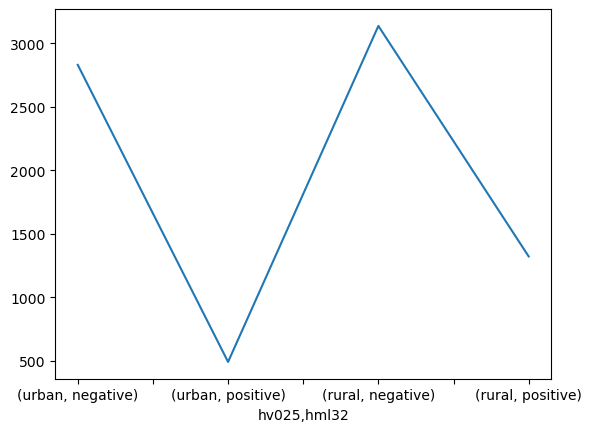

In [19]:
x.plot()



We can clearly see that there are less number of children tested positive and high number of children tested negative for malaria in urban areas than in rural areas. 

6. Make another plot showing the proportion of U5 children that tested positive for malaria by microscopy and the proportion of U5 children that tested negative for malaria by microscopy in urban and rural areas.

In [20]:
y = x.unstack()
y

hml32,negative,positive
hv025,,
urban,2830,490
rural,3137,1321


In [21]:
y1 = y['negative']/y['negative'].sum()
y1

hv025
urban    0.474275
rural    0.525725
Name: negative, dtype: float64

In [22]:
y2 = y['positive']/y['positive'].sum()
y2

hv025
urban    0.270569
rural    0.729431
Name: positive, dtype: float64

In [23]:
z1 = pd.DataFrame(y2.values, columns=['positive'], index=['urban', 'rural'])
z1

,positive
urban,0.270569
rural,0.729431


In [24]:
z2 = pd.DataFrame(y1.values, columns=['negative'], index=['urban', 'rural'])
z2

,negative
urban,0.474275
rural,0.525725


In [25]:
z = z1.join(z2).stack()
z

urban  positive    0.270569
       negative    0.474275
rural  positive    0.729431
       negative    0.525725
dtype: float64

<Axes: >

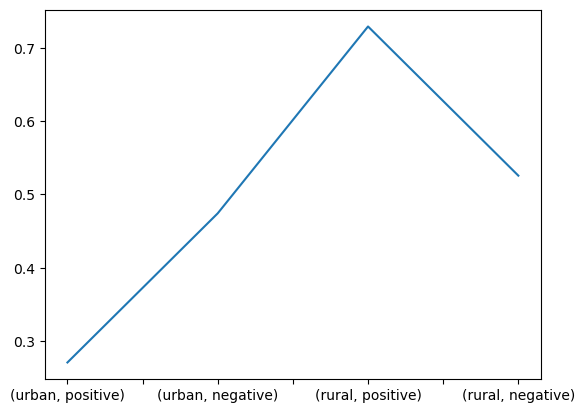

In [26]:
z.plot()

7. Make a map of the number of children that tested positive for malaria by state

In [27]:
dmap ={
    'NC Benue Urban':'Benue',
       'NC Benue Rural':'Benue',
       'NC FCT Abuja Urban': 'Abuja',
    'NC FCT Abuja Rural':'Abuja',
      'NC Kogi Urban':'Kogi', 
        'NC Kogi Rural': 'Kogi',
        'NC Kwara Urban':'Kwara',
           'NC Kwara Rural':'Kwara',
           'NC Nasarawa Urban':'Nasarawa',
            'NC Nasarawa Rural':'Nasarawa',
            'NC Niger Urban':'Niger',
            'NC Niger Rural':'Niger',
            'NC Plateau Urban':'Plateau',
'NC Plateau Rural':'Plateau',
'NE Adamawa Urban':'Adamawa',
 'NE Adamawa Rural':'Adamawa',
'NE Bauchi Urban':'Bauchi',
'NE Bauchi Rural':'Bauchi',
'NE Borno Urban':'Borno',
'NE Borno Rural':'Borno',
'NE Gombe Urban':'Gombe',
'NE Gombe Rural':'Gombe',
'NE Taraba Urban':'Taraba',
'NE Taraba Rural':'Taraba',
'NE Yobe Urban':'Yobe',
'NE Yobe Rural':'Yobe',
'NW Jigawa Urban':'Jigawa',
'NW Jigawa Rural': 'Jigawa',
'NW Kaduna Urban':'Kaduna',
'NW Kaduna Rural':'Kaduna',
'NW Kano Urban':'Kano',
'NW Kano Rural':'Kano',
'NW Katsina Urban':'Katsina',
'NW Katsina Rural':'Katsina',
'NW Kebbi Urban':'Kebbi',
'NW Kebbi Rural':'Kebbi',
'NW Sokoto Urban':'Sokoto',
'NW Sokoto Rural':'Sokoto',
'NW Zamfara Urban':'Zamfara',
'NW Zamfara Rural':'Zamfara',
'SE Abia Urban':'Abia',
'SE Abia Rural':'Abia',
'SE Anambra Urban':'Anambra',
'SE Anambra Rural':'Anambra',
'SE Ebonyi Urban':'Ebonyi',
'SE Ebonyi Rural':'Ebonyi',
'SE Enugu Urban':'Enugu',
'SE Enugu Rural':'Enugu',
'SE Imo Urban':'Imo',
'SE Imo Rural':'Imo',
'SS Akwa Ibom Urban':'Akwa Ibom',
 'SS Akwa Ibom Rural':'Akwa Ibom',
 'SS Bayelsa Urban':'Bayelsa',
'SS Bayelsa Rural':'Bayelsa',
 'SS Cross River Urban':'Cross River',
'SS Cross River Rural':'Cross River',
 'SS Delta Urban':'Delta',
'SS Delta Rural':'Delta',
'SS Edo Urban':'Edo',
 'SS Edo Rural':'Edo',
  'SS Rivers Urban':'Rivers',
'SS Rivers Rural':'Rivers',
 'SW Ekiti Urban':'Ekiti',
 'SW Ekiti Rural':'Ekiti',
 'SW Lagos Urban':'Lagos',
 'SW Lagos Rural':'Lagos',
  'SW Ogun Urban':'Ogun',
  'SW Ogun Rural':'Ogun',
 'SW Ondo Urban':'Ondo',
'SW Ondo Rural':'Ondo',
 'SW Osun Urban':'Osun',
 'SW Osun Rural':'Osun',
 'SW Oyo Urban':'Oyo',
 'SW Oyo Rural':'Oyo'} 


In [28]:
p = {x.lower():dmap[x].lower() for x in dmap}

In [29]:
dtng1n['state'] = dtng1n.hv023.map(p)

/tmp/ipykernel_2987/1070413187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtng1n['state'] = dtng1n.hv023.map(p)


In [30]:
dtng1n['state']

46        benue
55        benue
63        benue
87        benue
123       benue
          ...  
187961      oyo
187973      oyo
187974      oyo
187982      oyo
187987      oyo
Name: state, Length: 8117, dtype: object

In [31]:
s = dtng1n.iloc[:, [2,4,7]][dtng1n.hml32 == 'positive'][dtng1n.hml35 == 'positive']
s

/tmp/ipykernel_2987/1083987058.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s = dtng1n.iloc[:, [2,4,7]][dtng1n.hml32 == 'positive'][dtng1n.hml35 == 'positive']


,hml32,hml35,state
430,positive,positive,benue
696,positive,positive,benue
914,positive,positive,benue
935,positive,positive,benue
1191,positive,positive,benue
...,...,...,...
187590,positive,positive,oyo
187613,positive,positive,oyo
187614,positive,positive,oyo
187683,positive,positive,oyo


In [32]:
d = s.groupby('state').size()
d

state
abia         16
abuja        39
adamawa      35
akwa ibom    37
anambra      26
             ..
rivers       15
sokoto       60
taraba       45
yobe         27
zamfara      83
Length: 37, dtype: int64

<Axes: ylabel='state'>

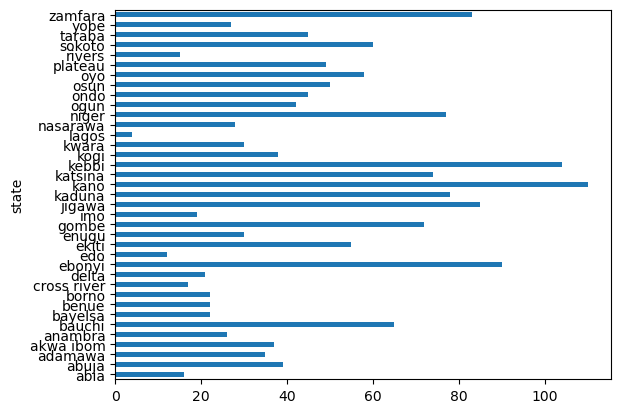

In [33]:
d.plot.barh()

In [54]:
gdf = gdf[['states', 'geometry']]

In [55]:
gdf

,states,geometry
0,Abia,"POLYGON ((7.48998 4.85506, 7.49438 4.84743, 7...."
1,Adamawa,"POLYGON ((12.01237 7.50763, 12.00726 7.50804, ..."
2,Akwa Ibom,"MULTIPOLYGON (((7.55570 4.50408, 7.55597 4.504..."
3,Anambra,"POLYGON ((7.25012 5.92631, 7.24832 5.92668, 7...."
4,Bauchi,"POLYGON ((11.01984 9.70526, 11.02580 9.69224, ..."
...,...,...
32,Rivers,"MULTIPOLYGON (((6.69722 4.45042, 6.69736 4.450..."
33,Sokoto,"POLYGON ((4.59020 11.82821, 4.59251 11.84297, ..."
34,Taraba,"POLYGON ((10.15367 7.03837, 10.15335 7.03845, ..."
35,Yobe,"POLYGON ((11.58203 10.65642, 11.58155 10.66303..."


In [60]:
gx = gdf['states'].str.lower()
gx = pd.DataFrame(gx)
gx = gx.rename(index=str, columns={'states':'cities'})
gx

,cities
0,abia
1,adamawa
2,akwa ibom
3,anambra
4,bauchi
...,...
32,rivers
33,sokoto
34,taraba
35,yobe


In [61]:
god = gdf.join(gx)
god

,states,geometry,cities
0,Abia,"POLYGON ((7.48998 4.85506, 7.49438 4.84743, 7....",abia
1,Adamawa,"POLYGON ((12.01237 7.50763, 12.00726 7.50804, ...",adamawa
2,Akwa Ibom,"MULTIPOLYGON (((7.55570 4.50408, 7.55597 4.504...",akwa ibom
3,Anambra,"POLYGON ((7.25012 5.92631, 7.24832 5.92668, 7....",anambra
4,Bauchi,"POLYGON ((11.01984 9.70526, 11.02580 9.69224, ...",bauchi
...,...,...,...
32,Rivers,"MULTIPOLYGON (((6.69722 4.45042, 6.69736 4.450...",rivers
33,Sokoto,"POLYGON ((4.59020 11.82821, 4.59251 11.84297, ...",sokoto
34,Taraba,"POLYGON ((10.15367 7.03837, 10.15335 7.03845, ...",taraba
35,Yobe,"POLYGON ((11.58203 10.65642, 11.58155 10.66303...",yobe


In [64]:
god = god.drop('states', axis=1)
god

,geometry,cities
0,"POLYGON ((7.48998 4.85506, 7.49438 4.84743, 7....",abia
1,"POLYGON ((12.01237 7.50763, 12.00726 7.50804, ...",adamawa
2,"MULTIPOLYGON (((7.55570 4.50408, 7.55597 4.504...",akwa ibom
3,"POLYGON ((7.25012 5.92631, 7.24832 5.92668, 7....",anambra
4,"POLYGON ((11.01984 9.70526, 11.02580 9.69224, ...",bauchi
...,...,...
32,"MULTIPOLYGON (((6.69722 4.45042, 6.69736 4.450...",rivers
33,"POLYGON ((4.59020 11.82821, 4.59251 11.84297, ...",sokoto
34,"POLYGON ((10.15367 7.03837, 10.15335 7.03845, ...",taraba
35,"POLYGON ((11.58203 10.65642, 11.58155 10.66303...",yobe


Preview of the map without data:

<Axes: >

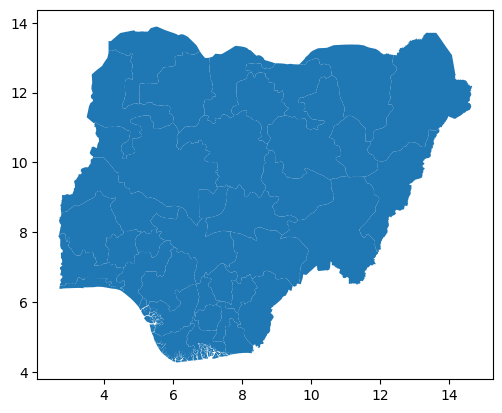

In [66]:
god.plot()

Now joining the data:

In [82]:
d = pd.DataFrame(d, dtype='int64')
f = d.rename(index=str, columns={0:'malapos'})
godm = god.set_index('cities').join(f)
godm

,geometry,malapos
cities,,
abia,"POLYGON ((7.48998 4.85506, 7.49438 4.84743, 7....",16.0
adamawa,"POLYGON ((12.01237 7.50763, 12.00726 7.50804, ...",35.0
akwa ibom,"MULTIPOLYGON (((7.55570 4.50408, 7.55597 4.504...",37.0
anambra,"POLYGON ((7.25012 5.92631, 7.24832 5.92668, 7....",26.0
bauchi,"POLYGON ((11.01984 9.70526, 11.02580 9.69224, ...",65.0
...,...,...
rivers,"MULTIPOLYGON (((6.69722 4.45042, 6.69736 4.450...",15.0
sokoto,"POLYGON ((4.59020 11.82821, 4.59251 11.84297, ...",60.0
taraba,"POLYGON ((10.15367 7.03837, 10.15335 7.03845, ...",45.0


In [85]:
godm.malapos = godm.malapos.fillna(0)
godm.malapos = godm.malapos.astype('int64')
godm

,geometry,malapos
cities,,
abia,"POLYGON ((7.48998 4.85506, 7.49438 4.84743, 7....",16
adamawa,"POLYGON ((12.01237 7.50763, 12.00726 7.50804, ...",35
akwa ibom,"MULTIPOLYGON (((7.55570 4.50408, 7.55597 4.504...",37
anambra,"POLYGON ((7.25012 5.92631, 7.24832 5.92668, 7....",26
bauchi,"POLYGON ((11.01984 9.70526, 11.02580 9.69224, ...",65
...,...,...
rivers,"MULTIPOLYGON (((6.69722 4.45042, 6.69736 4.450...",15
sokoto,"POLYGON ((4.59020 11.82821, 4.59251 11.84297, ...",60
taraba,"POLYGON ((10.15367 7.03837, 10.15335 7.03845, ...",45


/tmp/ipykernel_2987/3795361683.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


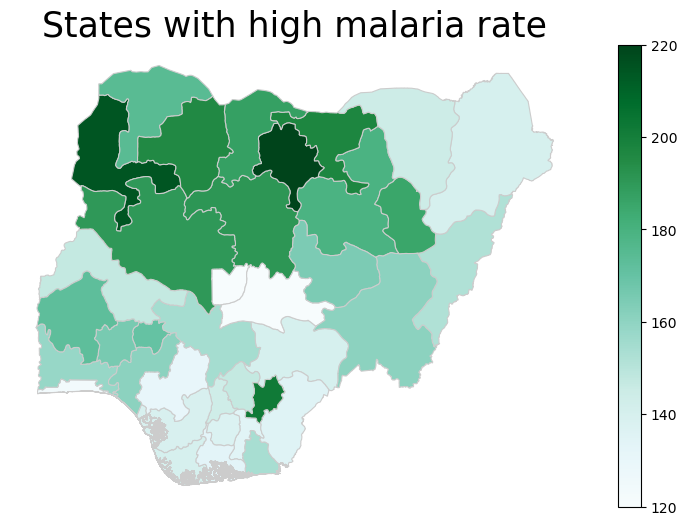

In [89]:
variab = 'malapos'
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 6))
godm.plot(column=variab, cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('States with high malaria rate', fontdict={'fontsize':'25', 'fontweight':'3'})
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = ['kano']
cbar = fig.colorbar(sm)

We can see that, unfortunately the state with highest positive malaria is Kano state followed by kebbi state.